Python 3.6.6 |Anaconda, Inc.| (default, Oct  9 2018, 12:34:16) 
Type 'copyright', 'credits' or 'license' for more information
IPython 7.5.0 -- An enhanced Interactive Python. Type '?' for help.

In [1725]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np  

###################################################
################ Importing Data #################
###################################################

In [1726]:
# ## Importing Data

# ## Clean Data
# df1 = pd.read_csv("abalone_v2.csv", encoding='ISO-8859-1')
# print(len(df1))
# df1.head()
# # Note: use '15' and all else as '8' for severely skewed classes

# ## Importing Unclean Data (with missing values)
# df1 = pd.read_csv("abalone_v2_missing.csv", encoding='ISO-8859-1')
# print(len(df1))
# df1.head()

## Importing Unclean Data (with missing values and outliers)
df1 = pd.read_csv("abalone_v2_missing_outlier.csv", encoding='ISO-8859-1')
print(len(df1))
df1.head()

4177


,Sex,Cat_2,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,val1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,val1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,val1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,val1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,val1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [1727]:
## Rename target to 'Target'
df1 = df1.rename(columns = {'Rings':'Target'})
df1.head()

,Sex,Cat_2,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Target
0,M,val1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,val1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,val1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,val1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,val1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [1728]:
## Check Distribution of Target Var
df1['Target'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Target, dtype: int64

In [1729]:
## Creating Binary Target (not skewed)
df1.loc[ ((df1['Target'] != 8) & (df1['Target'] != 9) & (df1['Target'] != 10)
          , 'Target')] = 0
df1.loc[ ((df1['Target'] == 8) | (df1['Target'] == 9) | (df1['Target'] == 10)
          , 'Target')] = 1
print(df1['Target'].value_counts())
df1.head(10)

# # Creating Binary Target (highly skewed)
# df1.loc[ (df1['Target'] != 15 , 'Target')] = 8
# print(df1['Target'].value_counts())
# df1.head(10)



0    2286
1    1891
Name: Target, dtype: int64


,Sex,Cat_2,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Target
0,M,val1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0
1,M,val1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0
2,F,val1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1
3,M,val1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1
4,I,val1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0
5,I,val1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,1
6,F,val1,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,0
7,F,val1,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,0
8,M,val1,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,1
9,F,val1,0.550,0.440,231.100,0.8945,0.3145,0.1510,0.320,0


###################################################
################ Data Summary #################
###################################################

In [1730]:
## Check each variable summary
df1.describe(include='all').transpose()

# Note: Outliers can be seen in 'min'/'max' columns

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Sex,4169,3,M,1523,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cat_2,4155,2,val2,2148,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Length,4150,NaN,NaN,NaN,0.527006,0.412561,-15.4,0.45,0.545,0.615,17.5
Diameter,4160,NaN,NaN,NaN,0.40788,0.0993208,0.055,0.35,0.425,0.48,0.65
Height,4160,NaN,NaN,NaN,0.200757,4.07829,-76.2,0.115,0.14,0.165,231.1
Whole_weight,4095,NaN,NaN,NaN,0.826532,0.491023,0.002,0.4395,0.7955,1.14975,2.8255
Shucked_weight,4142,NaN,NaN,NaN,0.359114,0.22245,0.001,0.186,0.335,0.503375,1.488
Viscera_weight,4129,NaN,NaN,NaN,0.180858,0.109594,0.0005,0.094,0.171,0.253,0.76
Shell_weight,4144,NaN,NaN,NaN,0.239016,0.139557,0.0015,0.13,0.23475,0.33,1.005
Target,4177,NaN,NaN,NaN,0.452717,0.497819,0,0,0,1,1


In [1731]:
## Check for missing values

# # in df
print(df1.isnull().values.any()) # returns T/F

# # col wise null count
# df1.loc[:, list(df1.loc[:, df1.isnull().any()].columns)].isnull().sum()

# col wise null% count
df1.loc[:,list(df1.loc[:,df1.isnull().any()].columns)].isnull().sum()/(len(df1))*100 # % 

True


Sex               0.191525
Cat_2             0.526694
Length            0.646397
Diameter          0.406991
Height            0.406991
Whole_weight      1.963131
Shucked_weight    0.837922
Viscera_weight    1.149150
Shell_weight      0.790041
dtype: float64

###################################################
####### Cleaning Data (Missing Value Treatment) ########
###################################################

In [1732]:
# ref code: https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/

In [1733]:
######### Missing Value Treatment #########

In [1734]:
## USER_INPUT
impute_vs_droprow = 'impute' # 'impute', 'drop_row' / 'None'
# if 'impute', select 'replacement_type'
replacement_type = 'mean_mode' # '0_unknown', 'mean_mode', 'median_mode', 'reg_class'/'None'
    # get the best using CV on Valid ('mean_mode' generally better)

In [1735]:
## 0/'unknown' imputation
if impute_vs_droprow == 'impute' and replacement_type == '0_unknown':
    for var in df1.columns.values:
        if var != 'Target':
            if np.issubdtype(df1[var], np.number): # num vars
                df1[var].fillna(0,inplace=True)
            else: # cat vars
                df1[var].fillna('unknown',inplace=True)

## Check for missing values
df1.isnull().values.any() # returns T/F 

True

In [1736]:
## Mean/Mode imputation
if impute_vs_droprow == 'impute' and replacement_type == 'mean_mode':
    for var in df1.columns.values:
        if var != 'Target':
            if np.issubdtype(df1[var], np.number): # num vars
                df1[var].fillna(df1[var].mean(),inplace=True)
            else: # cat vars
                df1[var].fillna(df1[var].mode()[0],inplace=True)

## Check for missing values
df1.isnull().values.any() # returns T/F 

False

In [1737]:
## Median/Mode imputation
if impute_vs_droprow == 'impute' and replacement_type == 'median_mode':
    for var in df1.columns.values:
        if var != 'Target':
            if np.issubdtype(df1[var], np.number): # num vars
                df1[var].fillna(df1[var].median(),inplace=True)
            else: # cat vars
                df1[var].fillna(df1[var].mode()[0],inplace=True)

## Check for missing values
df1.isnull().values.any() # returns T/F

False

In [1738]:
## Drop rows with NA
original_rows = len(df1)
if impute_vs_droprow == 'drop_row':
    df1 = df1.dropna()
without_NA_rows = len(df1)

with_NA_rows = original_rows - without_NA_rows
print("Original rows: {}".format(original_rows))
print("NA rows(removed): {}".format(with_NA_rows))
print("Final rows: {}".format(without_NA_rows))

## Check for missing values
df1.isnull().values.any() # returns T/F

Original rows: 4177
NA rows(removed): 0
Final rows: 4177


False

In [1739]:
## Regression/Classification imputation

In [1740]:
if impute_vs_droprow == 'impute' and replacement_type == 'reg_class':
    pass

########### DOESN'T SEEM A PACKAGE IS PRESENT - IMPLEMENT YOURSELF ###########

In [1741]:
# Note: Use above techniques as hyper-params for tuning

###################################################
####### Cleaning Data (Outlier Treatment-Must Do) ########
###################################################

In [1742]:
## USER_INPUT
outlier_treatment = 'None' # 'Tukeys'/'Grubbs'/'None'

In [1743]:
## Tukey's Test 

In [1744]:
## Check each variable summary
df1.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Sex,4177,3,M,1531,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cat_2,4177,2,val2,2170,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Length,4177,NaN,NaN,NaN,0.527006,0.411225,-15.4,0.45,0.545,0.615,17.5
Diameter,4177,NaN,NaN,NaN,0.40788,0.0991185,0.055,0.35,0.425,0.48,0.65
Height,4177,NaN,NaN,NaN,0.200757,4.06998,-76.2,0.115,0.14,0.165,231.1
Whole_weight,4177,NaN,NaN,NaN,0.826532,0.486178,0.002,0.4445,0.8085,1.1415,2.8255
Shucked_weight,4177,NaN,NaN,NaN,0.359114,0.221516,0.001,0.1865,0.3375,0.5005,1.488
Viscera_weight,4177,NaN,NaN,NaN,0.180858,0.108962,0.0005,0.095,0.172,0.2515,0.76
Shell_weight,4177,NaN,NaN,NaN,0.239016,0.139004,0.0015,0.13,0.235,0.3275,1.005
Target,4177,NaN,NaN,NaN,0.452717,0.497819,0,0,0,1,1


In [1745]:
# USER_INPUT
IQR_range = 3  # hyper-param
replace_with = 'mean' # 'mean'/'median'

In [1746]:
## Outlier Replacement - with mean/median

if outlier_treatment == 'Tukeys':
    for col in df1.columns.values:
        if (np.issubdtype(df1[col] ,np.number)) & (col != 'Target'):
            Q1 = df1[col].quantile(0.25)
            Q3 = df1[col].quantile(0.75)
            IQR = Q3 - Q1
            Max_limit = Q3 + IQR_range*IQR
            Min_limit = Q1 - IQR_range*IQR

            print("---{}---".format(col))

            count = 0
            for i, val in enumerate(df1[col]):
                if (val < Min_limit) | (val > Max_limit):
                    count += 1
    #                 print(val)
    #                 print(df1[col][i])
                    if replace_with == 'mean':
                        df1[col][i] = df1[col].mean()
                    else:
                        df1[col][i] = df1[col].median()
    #                 print(df1[col][i])
            print("number of outliers replaced for col '{}': {}".format(col, count))


In [1747]:
## Check each variable summary - after Outlier treatment
df1.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Sex,4177,3,M,1531,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cat_2,4177,2,val2,2170,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Length,4177,NaN,NaN,NaN,0.527006,0.411225,-15.4,0.45,0.545,0.615,17.5
Diameter,4177,NaN,NaN,NaN,0.40788,0.0991185,0.055,0.35,0.425,0.48,0.65
Height,4177,NaN,NaN,NaN,0.200757,4.06998,-76.2,0.115,0.14,0.165,231.1
Whole_weight,4177,NaN,NaN,NaN,0.826532,0.486178,0.002,0.4445,0.8085,1.1415,2.8255
Shucked_weight,4177,NaN,NaN,NaN,0.359114,0.221516,0.001,0.1865,0.3375,0.5005,1.488
Viscera_weight,4177,NaN,NaN,NaN,0.180858,0.108962,0.0005,0.095,0.172,0.2515,0.76
Shell_weight,4177,NaN,NaN,NaN,0.239016,0.139004,0.0015,0.13,0.235,0.3275,1.005
Target,4177,NaN,NaN,NaN,0.452717,0.497819,0,0,0,1,1


In [1748]:
# Note: Use IQR_range value as hyper-param for tuning

In [1749]:
## Grubb's Test

###################################################
################ Dummy Coding #################
###################################################

In [1750]:
# select categorical variables & create dummies
cat_vars = [x for x in list(df1.columns) if not np.issubdtype(df1[x].dtype, np.number)]
df2 = pd.get_dummies(df1, columns=cat_vars)
df2.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Target,Sex_F,Sex_I,Sex_M,Cat_2_val1,Cat_2_val2
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,0,1,1,0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,0,1,1,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,1,0,0,1,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1,0,0,1,1,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,0,1,0,1,0


In [1751]:
# drop last variable of dummy coding (for each cat var)
df2 = df2.drop(['Sex_M','Cat_2_val2'],axis=1) # if not removed, var. red. required
df2.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Target,Sex_F,Sex_I,Cat_2_val1
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,1,0,1
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,0,1,1


###################################################
########### Remove High Multi-Collinearity ############
###################################################

In [1752]:
from sklearn.linear_model import LinearRegression

def sklearn_vif(exogs, data):
    # initialize dictionaries
    vif_dict, tolerance_dict = {}, {}
    # form input data for each exogenous variable
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        X, y = data[not_exog], data[exog]
        # extract r-squared from the fit
        r_squared = LinearRegression().fit(X, y).score(X, y)
        # calculate VIF
        vif = 1/(1 - r_squared)
        vif_dict[exog] = vif
        # calculate tolerance
        tolerance = 1 - r_squared
        tolerance_dict[exog] = tolerance
    # return VIF DataFrame
    df_vif = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})

    return df_vif

In [1753]:
# visual inspection of multi-collinear vars
exogs = list(df2.columns)
exogs = [x for x in exogs if x != 'Target'] # remove 'Target'
vif_df = sklearn_vif(exogs=exogs, data=df2)
vif_df

,VIF,Tolerance
Length,1.084343,0.922217
Diameter,7.457793,0.134088
Height,1.002530,0.997476
Whole_weight,34.903095,0.028651
Shucked_weight,14.598504,0.068500
Viscera_weight,11.283037,0.088629
Shell_weight,11.802654,0.084727
Sex_F,1.294236,0.772656
Sex_I,1.717390,0.582279
Cat_2_val1,1.001298,0.998704


In [1754]:
## USER_INPUT
remove_multi_collinear = 'N' # 'Y'/'N'
vif_val = 10 # cutoff VIF; above 10 is recommended (through experiments)

In [1755]:
# automatically removes all multi-collinear vars above 'vif_val' threshold
vif_df = sklearn_vif(exogs=exogs, data=df2)
print(vif_df)

if remove_multi_collinear == 'Y':
    while max(vif_df['VIF']) > vif_val:
        for i, x in enumerate(vif_df['VIF']):
            if (x == max(vif_df['VIF'])):
                collinear_var = vif_df.index[i]
                print('\nVar removed: {}\n'.format(collinear_var))

                df2 = df2.drop(collinear_var, axis=1)
                exogs = list(df2.columns)

                vif_df = sklearn_vif(exogs=exogs, data=df2)
                print(vif_df)
                break
            
df2.head()

                      VIF  Tolerance
Length           1.084343   0.922217
Diameter         7.457793   0.134088
Height           1.002530   0.997476
Whole_weight    34.903095   0.028651
Shucked_weight  14.598504   0.068500
Viscera_weight  11.283037   0.088629
Shell_weight    11.802654   0.084727
Sex_F            1.294236   0.772656
Sex_I            1.717390   0.582279
Cat_2_val1       1.001298   0.998704


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Target,Sex_F,Sex_I,Cat_2_val1
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,1,0,1
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,0,1,1


###################################################
########### Feature Engineering ############
###################################################

###################################################
######### Feature Selection/Reduction - V1 ##########
###################################################

#################### Remove multi-collinear vars ####################

In [1756]:
## USER_INPUT
remove_multi_collinear = 'N' # 'Y'/'N'
vif_val = 20 # cutoff VIF; above 10 is recommended (through experiments)

In [1757]:
## Remove multi-collinear vars - post 'featue engineering'
vif_df = sklearn_vif(exogs=exogs, data=df2)
print(vif_df)

if remove_multi_collinear == 'Y':
    while max(vif_df['VIF']) > vif_val:
        for i, x in enumerate(vif_df['VIF']):
            if (x == max(vif_df['VIF'])):
                collinear_var = vif_df.index[i]
                print('\nVar removed: {}\n'.format(collinear_var))

                df2 = df2.drop(collinear_var, axis=1)
                exogs = list(df2.columns)

                vif_df = sklearn_vif(exogs=exogs, data=df2)
                print(vif_df)
                break
            
df2.head()

                      VIF  Tolerance
Length           1.084343   0.922217
Diameter         7.457793   0.134088
Height           1.002530   0.997476
Whole_weight    34.903095   0.028651
Shucked_weight  14.598504   0.068500
Viscera_weight  11.283037   0.088629
Shell_weight    11.802654   0.084727
Sex_F            1.294236   0.772656
Sex_I            1.717390   0.582279
Cat_2_val1       1.001298   0.998704


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Target,Sex_F,Sex_I,Cat_2_val1
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,1,0,1
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,0,1,1


#################### RFE (Recursive Feature Elimination) ####################

In [1758]:
## USER_INPUT
Remove_RFE_Vars = 'N' # 'Y'/'N'

In [1759]:
# ## RFE - check variable ranking using RFE
# from sklearn import datasets
# from sklearn.feature_selection import RFE, RFECV
# from sklearn.linear_model import LogisticRegression

# df2_ind_vars = df2.drop(['Target'], axis=1) # select ind vars

# # create a base classifier used to evaluate a subset of attributes
# model = LogisticRegression()
# # create the RFE model and select 3 attributes
# rfe = RFE(model, 1) # n here is user_defined
# rfe = rfe.fit(df2_ind_vars, df2['Target'])
# # summarize the selection of the attributes
# print(rfe.support_)
# print(rfe.ranking_)

In [1760]:
## RFECV - XGBoost - to identify insignificant variables
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import StratifiedKFold

xgb_m = XGBClassifier(objective='binary:logistic')
rfecv = RFECV(estimator=xgb_m, step=1, cv=StratifiedKFold(10), scoring='f1_macro') # use cv=10
# select 'scoring' from: https://scikit-learn.org/stable/modules/model_evaluation.html 
rfecv.fit(df2_ind_vars, df2['Target'])

# Note: RFE - XGBoost did better than RF

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
   estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
   min_features_to_select=1, n_jobs=None, scoring='f1_macro', step=1,
   verbose=0)

In [1761]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 6


In [1762]:
# ## RFECV - RF - to identify insignificant variables
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_selection import RFE, RFECV
# from sklearn.model_selection import StratifiedKFold

# rfc = RandomForestClassifier(random_state=101)
# rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='f1_macro') # use cv=10
# # select 'scoring' from: https://scikit-learn.org/stable/modules/model_evaluation.html 
# rfecv.fit(df2_ind_vars, df2['Target'])

In [1763]:
# print('Optimal number of features: {}'.format(rfecv.n_features_))

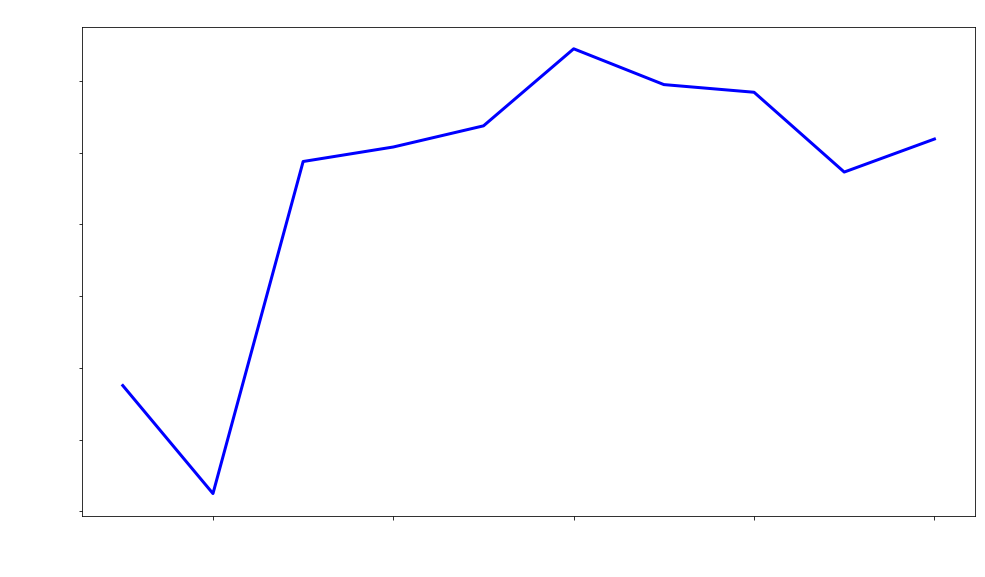

In [1764]:
## RFE - view accuracy plot for 'no of vars' (vars not in order)
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, 
          fontweight='bold', color='w')
plt.xlabel('Number of features selected', fontsize=14, labelpad=20, color='w')
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20, color='w')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='b', linewidth=3)
plt.xticks(fontsize=12, color='w')
plt.yticks(fontsize=12, color='w')

plt.show()

In [1765]:
# RFE - Insignificant Vars
print(rfecv.ranking_) # values >= 2 means insignificant var
print(df2_ind_vars.columns.values) # view all corresponding vars

[2 1 1 1 1 3 1 5 1 4]
['Length' 'Diameter' 'Height' 'Whole_weight' 'Shucked_weight'
 'Viscera_weight' 'Shell_weight' 'Sex_F' 'Sex_I' 'Cat_2_val1']


In [1766]:
## Drop Vars (marked insignificant by RFE)
if Remove_RFE_Vars == 'Y':
    drop_vars = [df2_ind_vars.columns.values[i] for i,x in enumerate(rfecv.ranking_) if x>1]
    df2 = df2.drop(drop_vars,axis=1)
    print("Insig. Vars identified by REF, removed: {}".format(drop_vars))
    print(df2.head())
else:
    print("Insig. Vars identified by REF, not removed: {}".format(drop_vars))
    print(df2.head())

Insig. Vars identified by REF, not removed: ['Height', 'Sex_F', 'Sex_I', 'Cat_2_val1']
   Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  Target  Sex_F  Sex_I  Cat_2_val1  
0         0.150       0      0      0           1  
1         0.070       0      0      0           1  
2         0.210       1      1      0           1  
3         0.155       1      0      0           1  
4         0.055       0      0      1           1  


#################### PCA (Principal Component Analysis) ####################

In [1767]:
## Applied later (as to be applied post Train-Val-Test split)

###################################################
############# Train-Vald-Test Split ##############
###################################################

In [1768]:
# 70:15:15

df = df2.copy()

np.random.seed(4)
msk = np.random.rand(len(df)) < 0.7

# Train set
Train = df[msk]

Vald_Test = df[~msk]
msk = np.random.rand(len(Vald_Test)) < 0.5

# Vald and Test sets
Vald = Vald_Test[msk]
Test = Vald_Test[~msk]

# QC
print(len(Train))
print(len(Vald))
print(len(Test))
len(Train)+len(Vald)+len(Test) == len(df2)

2912
651
614


True

###################################################
########### Separate X & Y of all datasets ############
###################################################

In [1769]:
X_Train = Train.drop(['Target'], axis=1)
Y_Train = Train[["Target"]]
X_Train = X_Train.as_matrix()
Y_Train = np.asarray(Y_Train).flatten()

X_Vald = Vald.drop(['Target'], axis=1)
Y_Vald = Vald[["Target"]]
X_Vald = X_Vald.as_matrix()
Y_Vald = np.asarray(Y_Vald).flatten()

X_Test = Test.drop(['Target'], axis=1)
Y_Test = Test[["Target"]]
X_Test = X_Test.as_matrix()
Y_Test = np.asarray(Y_Test).flatten()

# QC
print(len(X_Train)+len(X_Vald)+len(X_Test) == len(df2))
print(pd.value_counts(Y_Train))
print(pd.value_counts(Y_Vald))
print(pd.value_counts(Y_Test))

True
0    1600
1    1312
dtype: int64
0    354
1    297
dtype: int64
0    332
1    282
dtype: int64


/home/antrived/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/antrived/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/antrived/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


###################################################
############# Mean Standardization ##############
###################################################

In [1770]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_Train = sc.fit_transform(X_Train)
X_Vald = sc.transform(X_Vald)
X_Test = sc.transform(X_Test)

###################################################
######### Feature Selection/Reduction - V2 ##########
###################################################

########### PCA (Principal Component Analysis) ############

In [1771]:
## USER_INPUT
Apply_PCA = 'N' # 'Y'/'N'
variance_thresh = 0.99

In [1772]:
# Applying PCA function on training 
# and testing set of X component 
from sklearn.decomposition import PCA 

print("Number of Ind. Vars.: {}".format((len(X_Train[0]))))

if Apply_PCA == 'Y':
    for i in range(len(X_Train[0])):
        if i == len(X_Train[0])-1:
            break
        pca = PCA(n_components = i+1) 
        X_Train_PC = pca.fit_transform(X_Train)
        X_Vald_PC = pca.transform(X_Vald) 
        X_Test_PC = pca.transform(X_Test)
        explained_variance = pca.explained_variance_ratio_ 
        if sum(explained_variance) >= variance_thresh:
            break
            
    X_Train = X_Train_PC.copy()
    X_Vald = X_Vald_PC.copy()
    X_Test = X_Test_PC.copy()

    print("Number of Principal Components: {}".format(len(explained_variance)))
    print("Total Variance Explained: {}".format(sum(explained_variance)))
else:
    print("PCA not applied")

# does not generally work for lesser no of variables, but works for very high number 
    # like 200+

Number of Ind. Vars.: 10
PCA not applied


#####################################################################
############# XGBoost (Binary) ##############
#####################################################################

#######
####### Training (Base Model) & Validation
#######

In [1773]:
# Import classification related packages
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score, mean_squared_error
from sklearn.metrics import classification_report

def common_predictions(model, X_test, Y_test):
    y_pred = model.predict(X_test)
    y_pred = y_pred.astype(int)
#     y_pred[y_pred > 0.5] = 1
#     y_pred[y_pred <= 0.5] = 0
    return y_pred

In [1774]:
## Training
from xgboost import XGBClassifier
def xgb_classifier(X_Train, Y_Train, max_depth, learning_rate, n_estimators, objective):
    model = XGBClassifier(max_depth=max_depth, learning_rate=learning_rate, 
                          n_estimators=n_estimators, objective=objective)
    model.fit(X_Train, Y_Train)
    return model

# multi-class classification
model = xgb_classifier(X_Train, Y_Train, max_depth=8, learning_rate=0.001, 
                       n_estimators=200, objective='binary:logistic')

In [1775]:
## Prediction (class)
y_pred = common_predictions(model, X_Vald, Y_Vald)

## Prediction (probabilities)
    # use 'predict_proba'

In [1776]:
## Validation Accuracy
cm1 = confusion_matrix(y_pred, Y_Vald)
print(cm1)
print(classification_report(Y_Vald, y_pred))
# Micro Avg = Avg like this: P=(Match_1+Match_2+Match_3)/(Actual_1+Actual_2+Actual_3)
# Macro Avg = Avg of (P,R) for individual classes
# Weighted Avg = f-score weighted on support

    # Micro vs Macro Avg - 1 literature said micro is good for 
        # skewed multi-class classification(its wrong info); but in one experiment 
        # on skewed data, micro-avg was giving incorrect picture and macro was much better
        # so, macro-avg is the best indicator for skewed data
    # Macro Avg best for Skewed data - best for skewed data for both binary and 
        # multi-class classification as it gives equal weightage to classes 
        # irrespective of their occurance (if all classes are importance)

    # Ref: https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin
    
# get micro_f1, macro_f1, weighted_f1 (use to optimize params)
temp = classification_report(Y_Vald, y_pred)
list1 = temp.split()

first_class_f1 = list1[7]
last_class_f1 = list1[len(list1)-20]
micro_f1 = list1[len(list1)-14]
macro_f1 = list1[len(list1)-8]
wtd_f1 = list1[len(list1)-2]

print("first_class_f1: {}".format(first_class_f1))
print("last_class_f1: {}".format(last_class_f1))
print("micro_f1: {}".format(micro_f1))
print("macro_f1: {}".format(macro_f1))
print("wtd_f1: {}".format(wtd_f1))

# use micro_f1 for skewed multi-class classification

[[221  85]
 [133 212]]
              precision    recall  f1-score   support

           0       0.72      0.62      0.67       354
           1       0.61      0.71      0.66       297

   micro avg       0.67      0.67      0.67       651
   macro avg       0.67      0.67      0.67       651
weighted avg       0.67      0.67      0.67       651

first_class_f1: 0.67
last_class_f1: 0.66
micro_f1: 0.67
macro_f1: 0.67
wtd_f1: 0.67


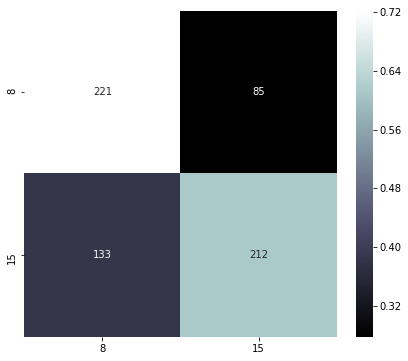

In [1777]:
## Plot Confusion Matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=classes, yticklabels=classes, cmap=cmap)
        plt.savefig('confusion-matrix.png')

plot_confusion_matrix(cm1, ['8', '15'])
# ref: https://github.com/gabrielziegler3/xgboost-multiclass-multilabel/blob/master/xgboost-multiclass-multilabel/multiclass-classification-examples.ipynb

#######
####### Hyper-Param Tuning (K-fold CV) - Grid/Random Search
####### 1st Approach - Recommended
####### (easily extensible to other algorithms)
#######

In [1778]:
## Training
from xgboost import XGBClassifier
def xgb_classifier(X_Train, Y_Train, max_depth, learning_rate, n_estimators, objective):
    model = XGBClassifier(max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators, objective=objective)
    model.fit(X_Train, Y_Train)
    return model

# multi-class classification
clf = xgb_classifier(X_Train, Y_Train, max_depth=12, learning_rate=0.05, 
                       n_estimators=100, objective='binary:logistic')

In [1779]:
## Training

# !pip install scikit-learn
import sys
import math
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_validate
sys.path.append('xgboost/wrapper/')
import xgboost as xgb

# USER INPUT
acc_type = 'f1_macro'
    # 'f1_micro', 'f1_macro', 'f1_weighted', 
    # refer: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring
cv_folds = 10
# also change 'objective': 'multi:softprob' as appropriate
search_type = 'RandomizedSearchCV' # 'RandomizedSearchCV', 'GridSearchCV'
iters_rand_search = 200 # applies for 'RandomizedSearchCV'
# set algo seach 'parameters' below

parameters = {
    'n_estimators': [100, 200, 300, 400], # no of trees
    'learning_rate': [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 0.6, 0.9],
    'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18], # doesn't work for too small values like [1, 2]
#     'gamma': [0, 0.2],
#     min_child_weight=1,
#     max_delta_step=0,
#     subsample=1,
#     'colsample_bytree': [0.7, 0.8, 1],
#     colsample_bylevel=1,
#     colsample_bynode=1,
#     reg_alpha=0,
#     reg_lambda=1,
#     scale_pos_weight=1,
}

if search_type == 'GridSearchCV':
    clf = GridSearchCV(clf, parameters, n_jobs=1, cv=cv_folds, scoring=acc_type)
elif search_type == 'RandomizedSearchCV':
    clf = RandomizedSearchCV(clf, parameters, n_jobs=1, 
                             cv=cv_folds, n_iter=iters_rand_search, scoring=acc_type)
    # 'n_iter' in random_search allows to do limited searches in a bigger search space
        # say 100 random searches in a search space of 10,000
        
clf.fit(X_Train, Y_Train)
print(clf.cv_results_)

print("------- Ranks(lower is good) -------")
print(clf.cv_results_['rank_test_score'])

list1 = list(clf.cv_results_['mean_test_score'])
best_loc = list1.index( max(list1) )

print("--- Best Location ---")
print(best_loc)

print("------- Best Score -------")
print(clf.cv_results_['mean_test_score'][best_loc])
print("------- Best Params -------")
print(clf.cv_results_['params'][best_loc])

# Insight: Even after 5 fold CV, model may seem to overfit for acc. metrics 
    # affected by skewed target like 'macro_f1'

{'mean_fit_time': array([1.9366267 , 1.03071048, 0.61588416, 0.23185661, 1.09189107,
       0.43744645, 2.35396323, 0.91454961, 0.60839   , 0.23397107,
       0.23725412, 1.96131179, 0.80777464, 1.02693613, 1.34292281,
       0.24923449, 0.74660254, 0.58267279, 1.00311291, 0.5386023 ,
       0.16667018, 0.83773103, 0.41413081, 0.08545306, 0.58179996,
       1.3510612 , 0.084408  , 1.92777462, 0.40685689, 1.12264318,
       0.38956828, 0.93453288, 0.25189824, 1.47242997, 2.44520495,
       1.20996106, 0.52425563, 0.90400381, 1.40355744, 1.78039486,
       0.27291911, 0.16586211, 0.08645077, 0.2789212 , 0.76894531,
       0.54405103, 1.15541492, 0.2183959 , 0.38832898, 0.16498086,
       0.80100281, 2.21436186, 1.65150938, 0.64672925, 1.03226013,
       1.22100534, 1.79913995, 0.22684138, 2.22765071, 0.37116592,
       0.42583952, 1.31065466, 0.44155202, 0.32838421, 0.20757437,
       0.16814742, 0.99286313, 1.1864181 , 1.68716431, 1.09615219,
       2.54664965, 0.44632699, 0.6142498 , 0

In [1784]:
## Prediction (class)
y_pred = common_predictions(clf, X_Vald, Y_Vald)

## Prediction (probabilities)
    # use 'predict_proba'

In [1785]:
## Validation Accuracy
cm1 = confusion_matrix(y_pred, Y_Vald)
print(cm1)
print(classification_report(Y_Vald, y_pred))

# get micro_f1, macro_f1, weighted_f1 (use to optimize params)
temp = classification_report(Y_Vald, y_pred)
list1 = temp.split()

first_class_f1 = list1[7]
last_class_f1 = list1[len(list1)-20]
micro_f1 = list1[len(list1)-14]
macro_f1 = list1[len(list1)-8]
wtd_f1 = list1[len(list1)-2]

print("first_class_f1: {}".format(first_class_f1))
print("last_class_f1: {}".format(last_class_f1))
print("micro_f1: {}".format(micro_f1))
print("macro_f1: {}".format(macro_f1))
print("wtd_f1: {}".format(wtd_f1))

# use micro_f1 for skewed multi-class classification

[[234  88]
 [120 209]]
              precision    recall  f1-score   support

           0       0.73      0.66      0.69       354
           1       0.64      0.70      0.67       297

   micro avg       0.68      0.68      0.68       651
   macro avg       0.68      0.68      0.68       651
weighted avg       0.68      0.68      0.68       651

first_class_f1: 0.69
last_class_f1: 0.67
micro_f1: 0.68
macro_f1: 0.68
wtd_f1: 0.68


In [ ]:
# Note: Only use k-fold CV for any param tuning

#####################################################################
############# XGBoost (Regression) ##############
#####################################################################

In [1782]:
# Regression
model = xgb_classifier(X_Train, Y_Train, max_depth=6, learning_rate=0.3, 
                       n_estimators=150, objective='reg:linear')
y_pred = common_predictions(model, X_Vald, Y_Vald)

# Validation
rmse = np.sqrt(mean_squared_error(Y_Vald, y_pred))
print("RMSE: %f" % (rmse))

[22:15:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 0.598257


In [1783]:
# Random Search - not running
# Ref: https://stats.stackexchange.com/questions/183984/how-to-use-xgboost-cv-with-hyperparameters-optimization